<a href="https://colab.research.google.com/github/abhijeet-gode/Machine_Learning/blob/Data-Science%2C-Data-Analysis/Credit_Risk_Classification_for_Default_financial_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Health predictive credit risk for defaulter
* Problem Statement:
The objective of this case study is to diagnose the financial health of the business and build a machine learning framework that can be used to identify companies at risk of defaulting in next financial year.
Goal is to build a classification model, that can assign probability of default.

* Definition of Default(Target_variable):
Companies with negative Net Worth Next Year are defined as defaulted companies.


In [ ]:
# Loading Module and Library Setup for Data Analysis and Model Building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading and initial exploration
data = pd.read_csv('/content/Credit_Risk_Data.csv')
data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [ ]:
print(data.info()) # Return the Feature_name, Count, Dtype, non_null information for dataset
data.describe().T # Basic stats summary with count, mean, std, min, 25%, 50%, 75%, max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3468 non-null   int64  
 1   Networth Next Year                           3468 non-null   float64
 2   Total assets                                 3468 non-null   float64
 3   Net worth                                    3468 non-null   float64
 4   Total income                                 3305 non-null   float64
 5   Change in stock                              3056 non-null   float64
 6   Total expenses                               3357 non-null   float64
 7   Profit after tax                             3363 non-null   float64
 8   PBDITA                                       3363 non-null   float64
 9   PBT                                          3363 non-null   float64
 10  

,count,mean,std,min,25%,50%,75%,max
Num,3468.0,1.761644e+03,1.022097e+03,1.000000e+00,8.767500e+02,1759.500,2.641250e+03,3.544000e+03
Networth Next Year,3468.0,1.650282e+03,1.764090e+04,-7.426560e+04,3.510000e+01,121.750,4.735250e+02,8.057734e+05
Total assets,3468.0,3.507365e+03,3.129084e+04,1.000000e-01,1.003000e+02,319.650,1.136800e+03,1.176509e+06
Net worth,3468.0,1.320163e+03,1.352668e+04,1.000000e-01,3.340000e+01,105.700,3.852500e+02,6.131516e+05
Total income,3305.0,4.628751e+03,5.599847e+04,1.000000e-01,1.118000e+02,452.700,1.454000e+03,2.442828e+06
Change in stock,3056.0,4.209116e+01,4.421448e+02,-3.029400e+03,-1.800000e+00,1.650,1.812500e+01,1.418550e+04
Total expenses,3357.0,4.313063e+03,5.338081e+04,-1.000000e-01,1.016000e+02,424.600,1.384900e+03,2.366035e+06
Profit after tax,3363.0,2.818020e+02,3.085267e+03,-3.908300e+03,6.000000e-01,9.200,5.285000e+01,1.194391e+05
PBDITA,3363.0,5.856111e+02,5.692702e+03,-3.939000e+02,7.300000e+00,37.300,1.539500e+02,2.085765e+05
PBT,3363.0,3.896798e+02,4.145252e+03,-3.894800e+03,9.000000e-01,12.900,7.360000e+01,1.452926e+05


# Findings:
- DataSet size = 3468r and 52 col.
- Multiple variable have missing values.
- Dataset primary dtype with float64 and one is int64.
- Num is continuous int kind of identifier
- With descripive stats got to know features property.

In [ ]:
data.isna().sum() # Return the total null value with feature name and count

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    163
Change in stock                                 412
Total expenses                                  111
Profit after tax                                105
PBDITA                                          105
PBT                                             105
Cash profit                                     105
PBDITA as % of total income                      58
PBT as % of total income                         58
PAT as % of total income                         58
Cash profit as % of total income                 58
PAT as % of net worth                             0
Sales                                           220
Income from financial services                  875
Other income                                   1240
Total capita

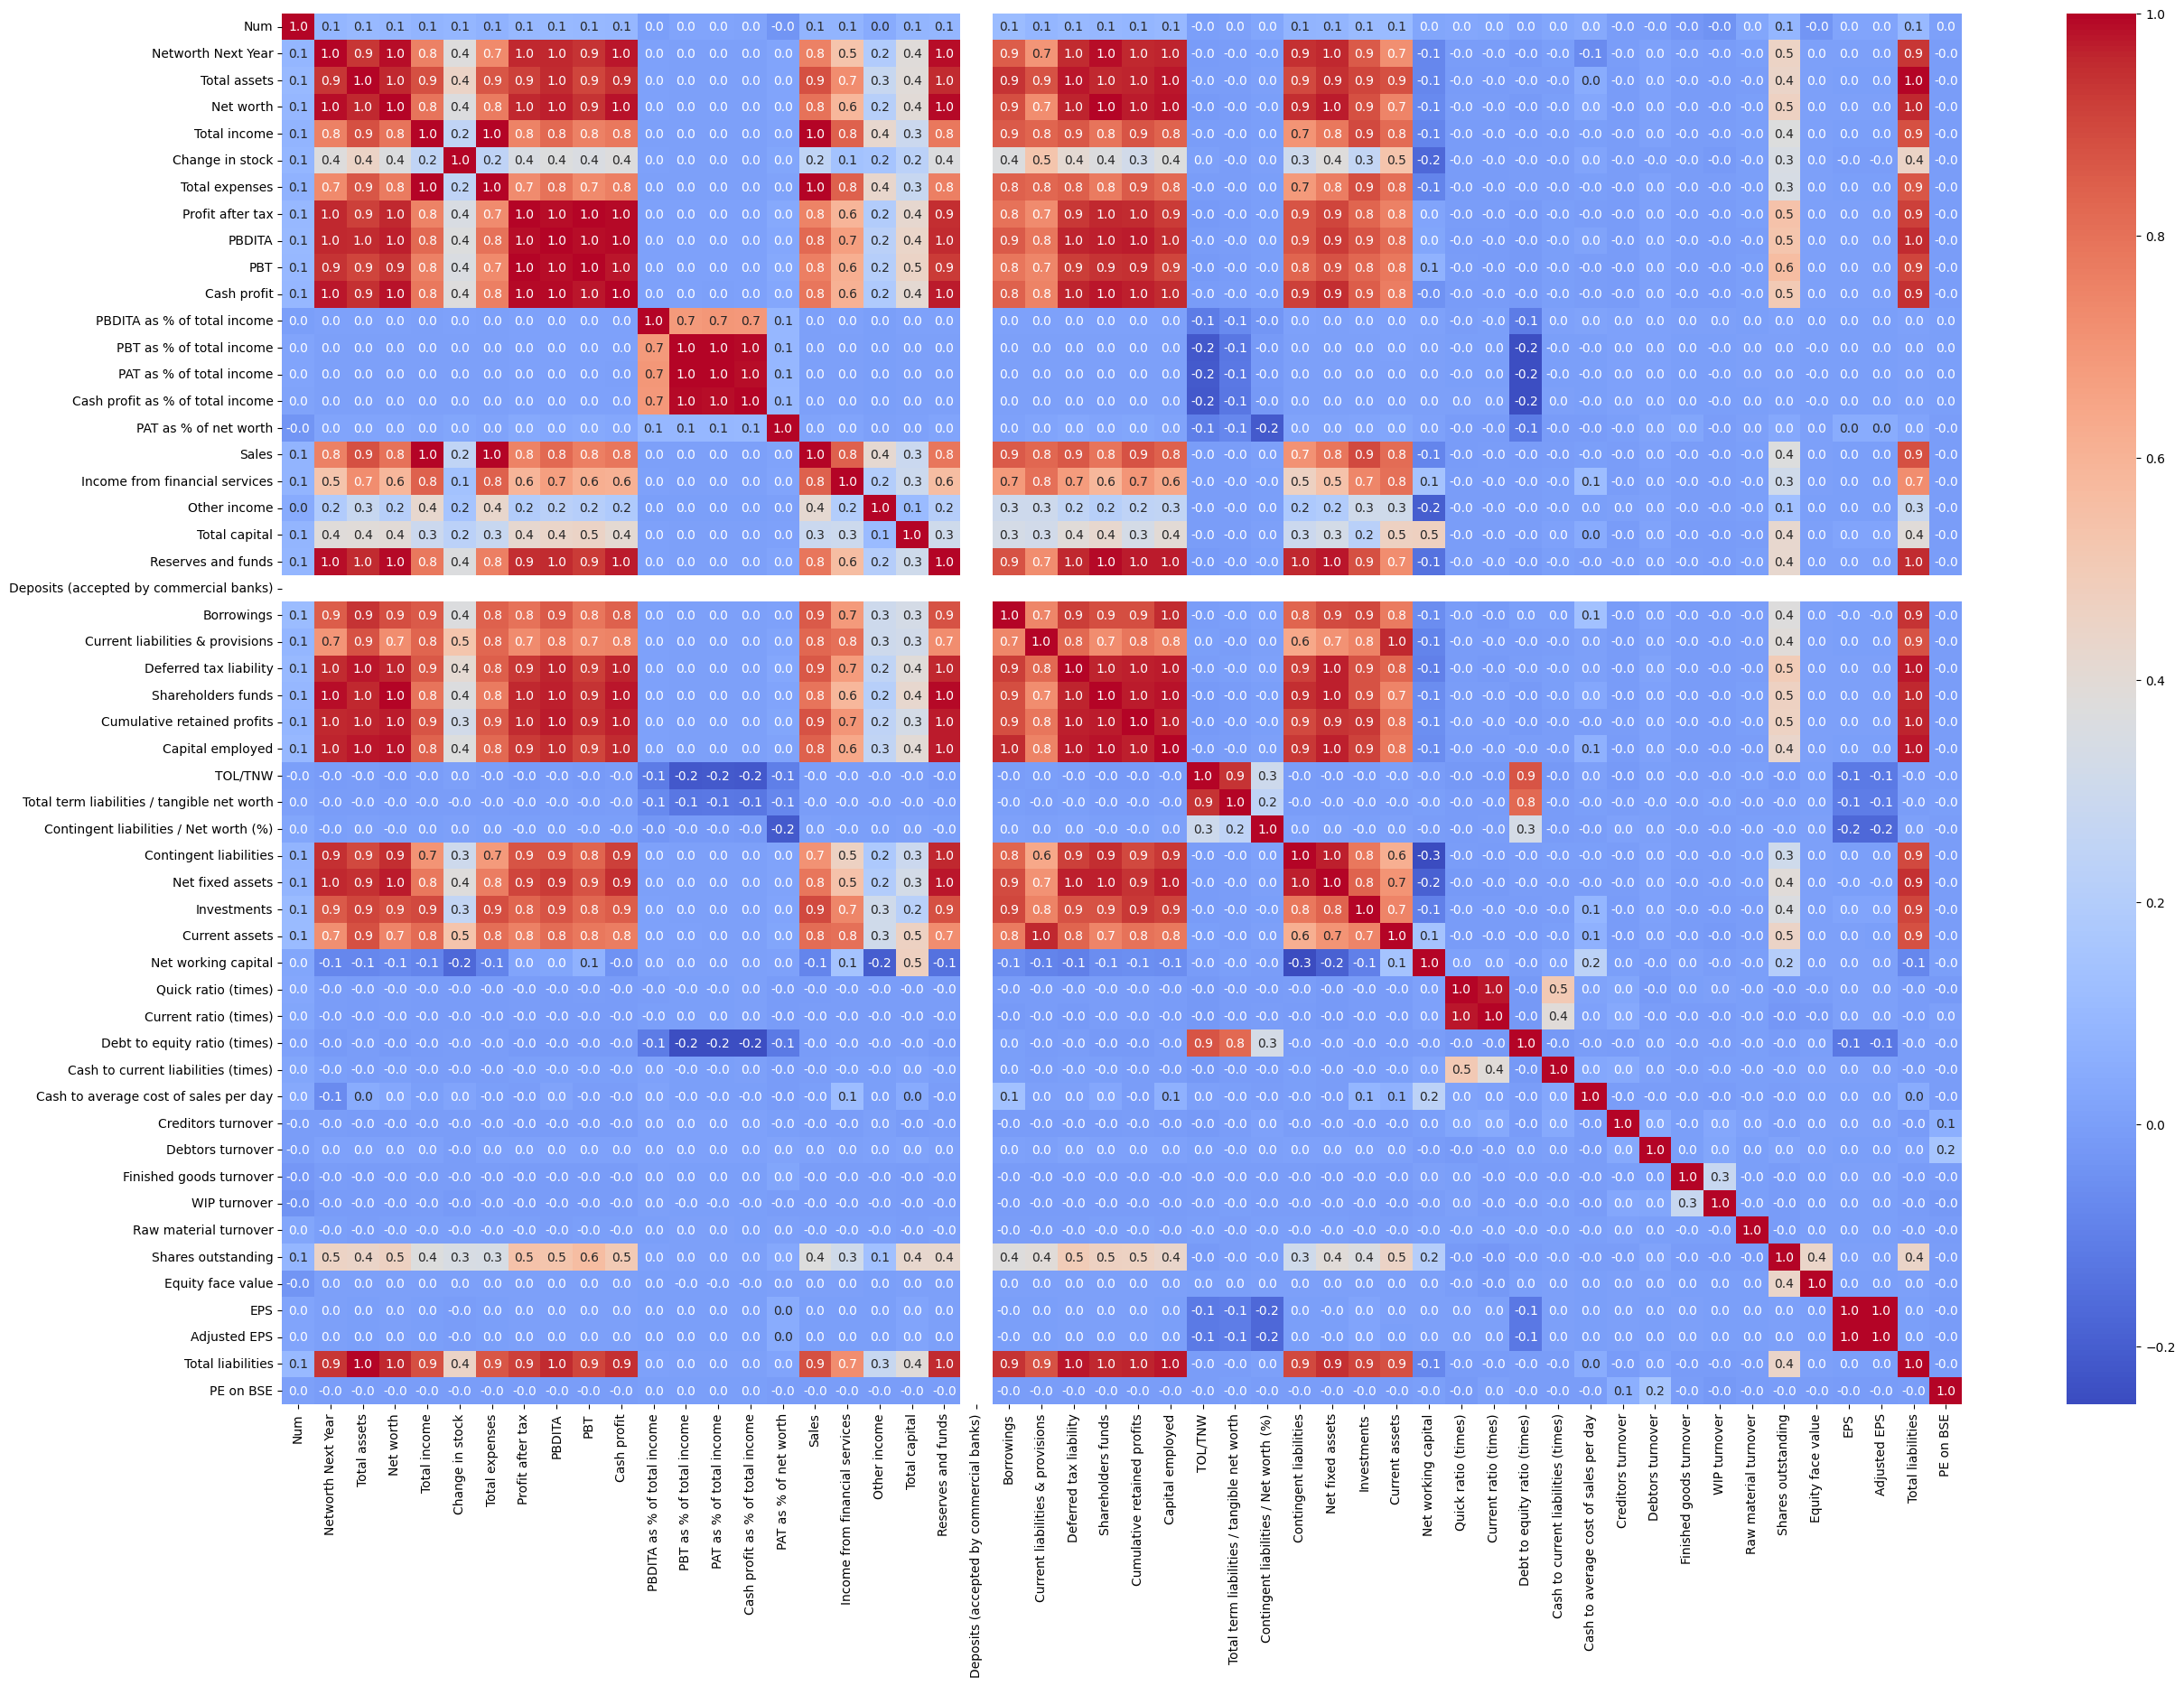

Networth Next Year                             1.000000
Net worth                                      0.988382
Reserves and funds                             0.987707
Shareholders funds                             0.987653
Cash profit                                    0.976028
Capital employed                               0.962374
Net fixed assets                               0.960673
Cumulative retained profits                    0.959979
Profit after tax                               0.958165
PBDITA                                         0.956760
Deferred tax liability                         0.952147
Contingent liabilities                         0.941634
PBT                                            0.938144
Total liabilities                              0.935608
Total assets                                   0.935608
Investments                                    0.853354
Borrowings                                     0.851175
Sales                                          0

In [ ]:
# Lets Explore the correlation between features and target variable
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()
correlation_target = data.corr()['Networth Next Year'].sort_values(ascending=False)
print(correlation_target)

Considering the feature based on the correlation is crusial and commendable also its based on domain and base study depends which are best but we go with high positive correlation features.
* Highly Correlation Features: Removing one of the following pairs due to strong positive correlation (>0.9):
1. Net Worth and Shareholders Funds
2. Cash profit and cumulative retained profits
3. Deferred tax liability and Contingent liabilities
4. PBT and Total liabilities
5. Total assets and Total Liabilities
6. Investment and Borrowings

* Low Correlation with Target: Considering removing the feature with absolute correlation (< 0.5) -  But in this case we still remain with good number of positive correlation variables so we extending limit (< 0.8):

In [ ]:
# Features Selection based on correlation with target
threshold = 0.8 # Setting the threshold for retention
target_abs = data.corr()['Networth Next Year'].abs() # returns the absolute correlation with target variable
low_correlation_features = target_abs[target_abs < threshold].index # Identify features with correlation threshold
data_filtered = data.drop(columns=low_correlation_features) # Dropping the features with low correlation
# Additional feature with high correlation
data = data_filtered.drop(columns=['Shareholders funds', 'Cash profit', 'Deferred tax liability', 'PBT', 'Total assets', 'Investments', 'Deposits (accepted by commercial banks)'])
data.head()

,Networth Next Year,Net worth,Profit after tax,PBDITA,Reserves and funds,Borrowings,Cumulative retained profits,Capital employed,Contingent liabilities,Net fixed assets,Total liabilities
0,8890.6,7093.2,1543.2,2860.2,6822.8,14.9,6263.3,7108.1,1049.7,1900.2,17512.3
1,394.3,351.5,115.2,283.0,257.8,272.5,247.4,624.0,67.6,286.4,941.0
2,92.2,100.6,-6.6,5.8,19.2,35.4,32.4,136.0,46.1,38.7,232.8
3,2.7,2.7,NaN,NaN,2.2,NaN,2.2,2.7,NaN,2.5,2.7
4,109.0,107.6,5.5,31.0,161.8,193.1,82.7,300.7,37.6,94.8,478.5


In [ ]:
# # Imputing Missing values
# imputer = KNNImputer(n_neighbors=5) # Create a KNNImputer Instance with initial base
# # Fit the dataset exclusing the target variable
# imputer.fit(data.drop('Networth Next Year', axis=1), data['Networth Next Year'])
# # Transform the dataset to impute missing values
# data_imputed = imputer.transform(data.drop('Networth Next Year', axis=1))
# # Creating a dataframe with imputed values and original columns
# data_imputed = pd.DataFrame(data_imputed, columns=data.columns.drop('Networth Next Year'))

In [ ]:
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data.drop('Networth Next Year', axis=1)), columns=data.columns.drop('Networth Next Year'))

In [ ]:
print(data_imputed.isna().sum()) # Checking the missing values

Net worth                      0
Profit after tax               0
PBDITA                         0
Reserves and funds             0
Borrowings                     0
Cumulative retained profits    0
Capital employed               0
Contingent liabilities         0
Net fixed assets               0
Total liabilities              0
dtype: int64


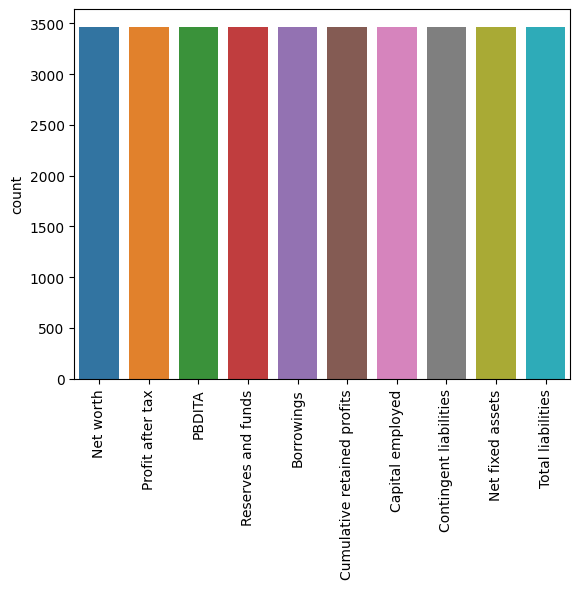

In [ ]:
sns.countplot(data_imputed) # Seaborn modue to help visualize data
plt.xticks(rotation=90) # Rotating the feature names
plt.show() # display the plot

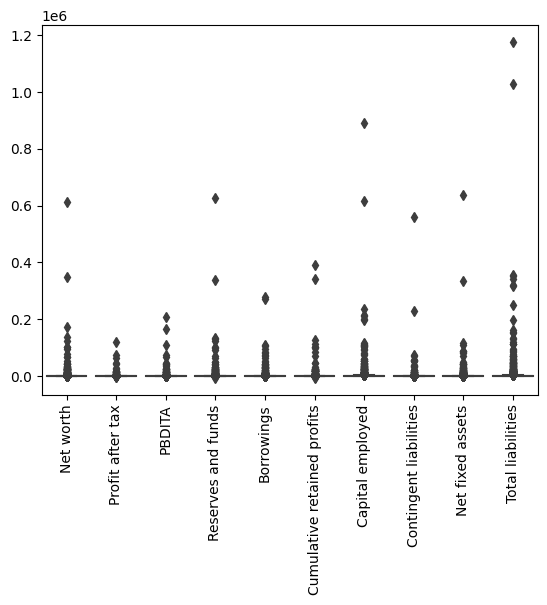

In [ ]:
sns.boxplot(data_imputed) # Using boxplot to check outliers and distibution
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Outlier removing
# Capping the data to remove the outliers with IQR
for col in data_imputed.columns: # using data with imputed with KNNI
  q1 = data_imputed[col].quantile(0.25) # calculating the Quantile q1 and q3 to perform IQR
  q3 = data_imputed[col].quantile(0.75)
  iqr = q3 - q1           # making Interquartile Range
  lower_bound = q1 - 1.5 * iqr # Calculating the lower bound for capping
  upper_bound = q3 + 1.5 * iqr # Calculating the upper bound for capping
  data_imputed[col] = data_imputed[col].clip(lower_bound, upper_bound) # Applying the capping to the data

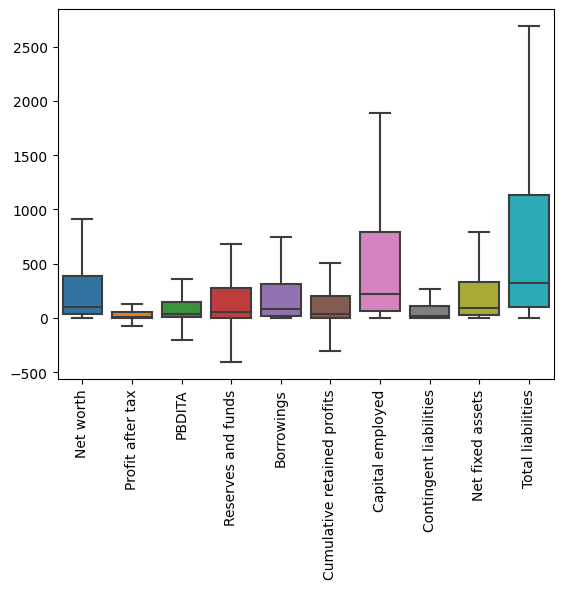

In [ ]:
sns.boxplot(data_imputed) # Using boxplot to check outliers and distibution
plt.xticks(rotation=90)
plt.show()

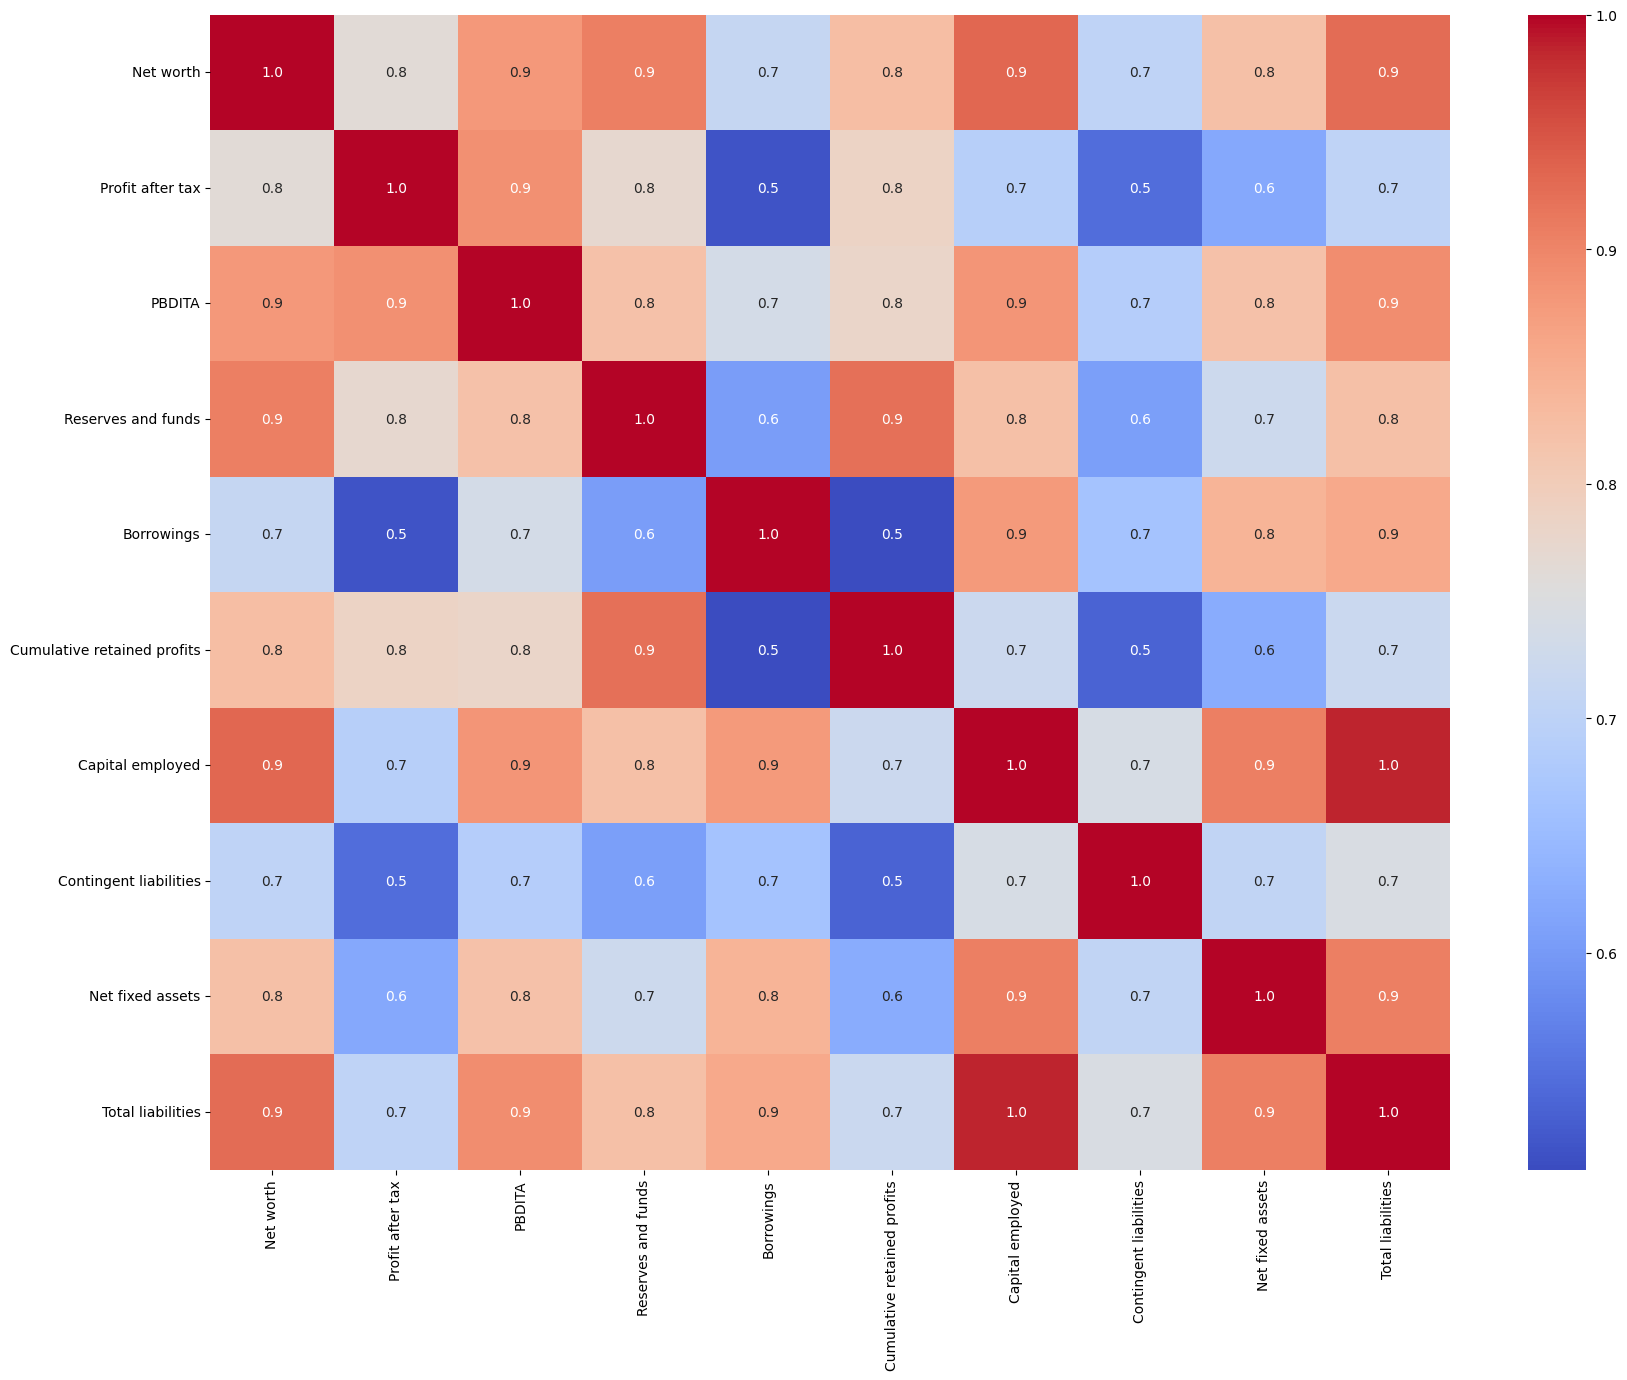

In [ ]:
# Checking the correlation matrix only for independent variable
plt.figure(figsize=(20,15))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [ ]:
# Feature Scaling with RobustdScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(data_imputed)
y = (data['Networth Next Year'] < 0).astype(int)

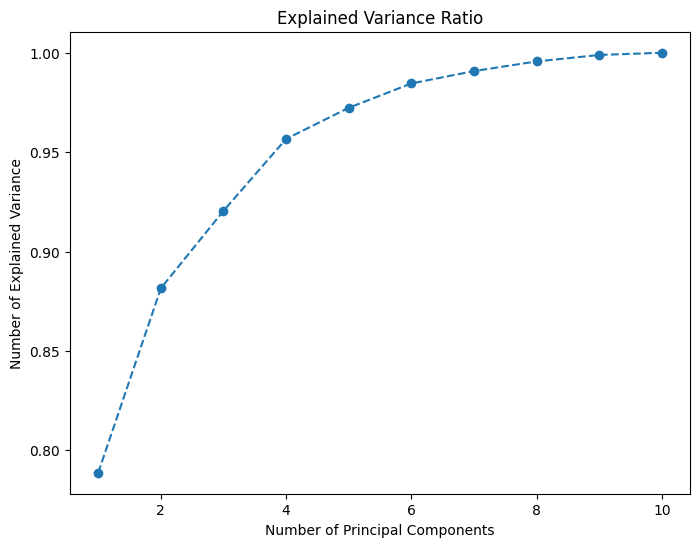

In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA() # Initialize PCA
# Fit and transform the data
x_pca = pca.fit_transform(X_scaled)

#plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title("Explained Variance Ratio")
plt.xlabel('Number of Principal Components')
plt.ylabel('Number of Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Importances calculating with Randomforest Classifier
features_model = RandomForestRegressor()
features_model.fit(X_scaled,y) # Fiting data to model
imp_features = dict(zip(data_imputed.columns,  features_model.feature_importances_)) # Importance score for features
for feature, imp_score in imp_features.items():
  print(f'{feature}: {imp_score}')

Net worth: 0.23303232461511258
Profit after tax: 0.26015183439522976
PBDITA: 0.08213202951711113
Reserves and funds: 0.07541446716192096
Borrowings: 0.05414899556039713
Cumulative retained profits: 0.08203618456334023
Capital employed: 0.03950150274612919
Contingent liabilities: 0.056747689989982995
Net fixed assets: 0.06576794356196278
Total liabilities: 0.051067027888813316


In [ ]:
# Feature Selection using SelectKBest and F_classif
def select_best_features(X_train, y_train, k=5):
    # Initializing the SelectKBest with f_classif as the scoring function
    k_best_selector = SelectKBest(score_func=f_classif, k=k)

    # Transforming the training set
    X_train_selected = k_best_selector.fit_transform(X_train, y_train)

    # Extracting feature scores and names
    feature_scores = k_best_selector.scores_
    feature_names = data_imputed.columns

    # Selecting the top k features based on scores
    best_features = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)[:k]

    # Printing the top features and their scores
    for name, score in best_features:
        print(f"Feature: {name}, Score: {score:.4f}")

select_best_features(X_train, y_train, k=5)


Feature: Profit after tax, Score: 119.3337
Feature: Net worth, Score: 60.6552
Feature: Borrowings, Score: 9.7854
Feature: PBDITA, Score: 8.9519
Feature: Reserves and funds, Score: 0.0197


In [ ]:
# Model training and evaluation for the classification with Accuracy, Recall, Precision, ROC_AUC
# Model for classification
classifiers = [RandomForestClassifier(),
              DecisionTreeClassifier(),
              GradientBoostingClassifier(),
              LogisticRegression(max_iter=1000),
              SVC()
              ]
for model in classifiers:  # Iterating the each model
  model.fit(X_train, y_train) # Fiting the model on the scaled training data
  y_pred = model.predict(X_val) # Prediction on the validation set
  accuracy = accuracy_score(y_val, y_pred) # Evaluating the model performance
  precision = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  ROC_AUC = roc_auc_score(y_val, y_pred)
  # Printing the results
  print(f"Model:: {model.__class__.__name__}")
  print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC_AUC: {ROC_AUC:.4f}\n')


Model:: RandomForestClassifier
Accuracy: 0.9366, Precision: 0.6000, Recall: 0.1915, ROC_AUC: 0.5911

Model:: DecisionTreeClassifier
Accuracy: 0.9193, Precision: 0.3548, Recall: 0.2340, ROC_AUC: 0.6016

Model:: GradientBoostingClassifier
Accuracy: 0.9380, Precision: 0.5833, Recall: 0.2979, ROC_AUC: 0.6412

Model:: LogisticRegression
Accuracy: 0.9366, Precision: 0.6154, Recall: 0.1702, ROC_AUC: 0.5812

Model:: SVC
Accuracy: 0.9352, Precision: 0.6667, Recall: 0.0851, ROC_AUC: 0.5410



In [ ]:
# Hyperparameter tuning with GridSearchCV

# Define hyperparameter grids for each classifier
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Perform GridSearchCV for each classifier
for model_name, model in zip(['RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'SVC'], classifiers):
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best hyperparameters and their corresponding scores
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best hyperparameters for {model_name}: {best_params}")
    print(f"Best cross-validated accuracy: {best_score:.4f}\n")


Best hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy: 0.9589

Best hyperparameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validated accuracy: 0.9488

Best hyperparameters for GradientBoostingClassifier: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best cross-validated accuracy: 0.9564

Best hyperparameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best cross-validated accuracy: 0.9521

Best hyperparameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy: 0.9524



Initially when model is evaluated the Gradient Boosting Classifier is best model with 94%, After hyperparameter we can see Random Forest Classifier and Gradient Boosting Classifier both with best model and have best parameter with 96%.


In [ ]:
# Best model with best parameters
model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=200)
# Creating a pipeline for original data
pipeline = Pipeline([
    ('Scaler', RobustScaler(with_centering=False)),
    ('Model', model)
])

# Fit the training data to the pipeline
pipeline.fit(X_train, y_train)
# Function for making predictions
def predict_credit_risk():
    feature_input = ['Profit after tax', 'Net worth', 'PBDITA', 'Reserves and funds', 'Borrowings']
    user_input = [float(input(f"Enter values for {feature}: ")) for feature in feature_input]
    input_feature = dict(zip(feature_input, user_input))
    dataframe = pd.DataFrame([input_feature])
    prediction = pipeline.predict(dataframe)
    return 'Financial health for next year Defaulter' if prediction[0] == 0 else 'Financial health for next year is Not-Default'

In [ ]:
# [-1.33739949,  0.14996966,  0.40884962,  0.66154103,  0.05013905]
predict_credit_risk()

Enter values for Profit after tax: -1.4
Enter values for Net worth: 0.12
Enter values for PBDITA: 0.51
Enter values for Reserves and funds: 0.74
Enter values for Borrowings: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


'Financial health for next year Defaulter'

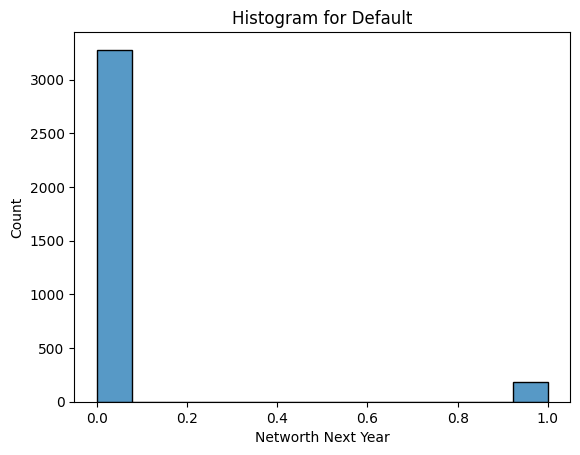

0    3280
1     188
Name: Networth Next Year, dtype: int64

In [ ]:
sns.histplot(y)
plt.title('Histogram for Default')
plt.show()
y.value_counts()

In [ ]:
# Handling class imbalance with Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_pca, y)

# Model evaluation on Random Undersampling
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('*'*10, 'Random Undersampling', '*'*10)
for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC_AUC: {roc_auc:.4f}\n')


********** Random Undersampling **********
Model: RandomForestClassifier
Accuracy: 0.8947, Precision: 0.8857, Recall: 0.8857, ROC_AUC: 0.8941

Model: DecisionTreeClassifier
Accuracy: 0.7632, Precision: 0.6977, Recall: 0.8571, ROC_AUC: 0.7700

Model: GradientBoostingClassifier
Accuracy: 0.8421, Precision: 0.8485, Recall: 0.8000, ROC_AUC: 0.8390

Model: LogisticRegression
Accuracy: 0.7237, Precision: 0.6400, Recall: 0.9143, ROC_AUC: 0.7376

Model: SVC
Accuracy: 0.7237, Precision: 0.6346, Recall: 0.9429, ROC_AUC: 0.7397



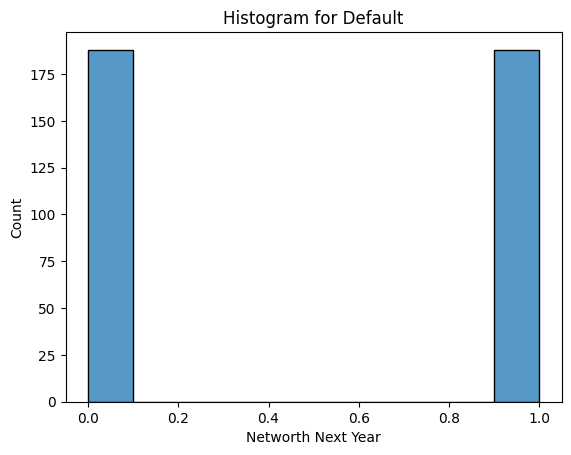

0    188
1    188
Name: Networth Next Year, dtype: int64

In [ ]:
sns.histplot(y_resampled)
plt.title('Histogram for Default')
plt.show()
y_resampled.value_counts()

In [ ]:
# Handling class imbalance with SMOTE Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Model evaluation on SMOTE Oversampling
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('*'*10, 'SMOTE Oversampling', '*'*10)
for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC_AUC: {roc_auc:.4f}\n')

********** SMOTE Oversampling **********
Model: RandomForestClassifier
Accuracy: 0.9512, Precision: 0.9472, Recall: 0.9531, ROC_AUC: 0.9513

Model: DecisionTreeClassifier
Accuracy: 0.9322, Precision: 0.9232, Recall: 0.9391, ROC_AUC: 0.9323

Model: GradientBoostingClassifier
Accuracy: 0.9009, Precision: 0.8960, Recall: 0.9016, ROC_AUC: 0.9009

Model: LogisticRegression
Accuracy: 0.8453, Precision: 0.7879, Recall: 0.9344, ROC_AUC: 0.8474

Model: SVC
Accuracy: 0.8628, Precision: 0.8168, Recall: 0.9266, ROC_AUC: 0.8643



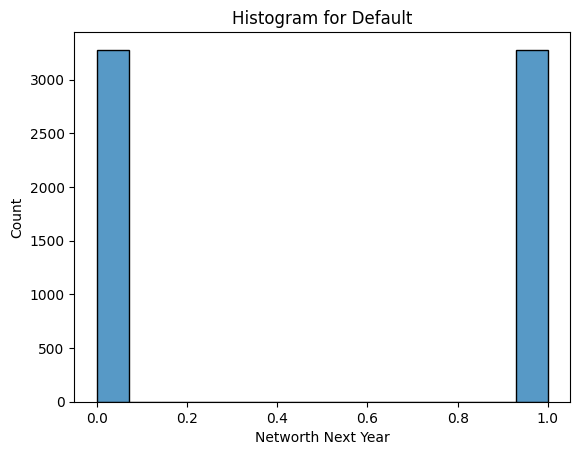

0    3280
1    3280
Name: Networth Next Year, dtype: int64

In [ ]:
sns.histplot(y_resampled)
plt.title('Histogram for Default')
plt.show()
y_resampled.value_counts()

In [ ]:
# Best model with best parameters
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
# Creating a pipeline on SMOTE
pipeline = Pipeline([
    ('Scaler', RobustScaler(with_centering=False, with_scaling=True)),
    ('Model', model)
])

# Fit the training data to the pipeline
pipeline.fit(X_resampled, y_resampled)
# Function for making predictions
def predict_credit_risk():
    feature_input = ['Profit after tax', 'Net worth', 'PBDITA', 'Reserves and funds', 'Borrowings']
    user_input = [float(input(f"Enter values for {feature}: ")) for feature in feature_input]
    input_feature = dict(zip(feature_input, user_input))
    dataframe = pd.DataFrame([input_feature])
    prediction = pipeline.predict(dataframe)
    return 'Financial health for next year Defaulter' if prediction[0] == 0 else 'Financial health for next year is Not-Default'

In [ ]:
# [ 1.55902323, -1.08575767,  0.05491221, -1.3738556 , -0.13062375]
predict_credit_risk()

Enter values for Profit after tax: 1.67
Enter values for Net worth: 2.45
Enter values for PBDITA: 0.24
Enter values for Reserves and funds: -1.23
Enter values for Borrowings: 1.54


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


'Financial health for next year Defaulter'